In [116]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

In [117]:
df = pd.read_csv('national.csv')

In [118]:
df

,Date,Daily_Confirmed,Confirmed,Recovered,Recovered.1,Deceased,Total_Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,1-Feb,0,1,0,0,0,0
3,2-Feb,1,2,0,0,0,0
4,3-Feb,1,3,0,0,0,0
...,...,...,...,...,...,...,...
175,23-Jul,48443,1288128,33326,817485,755,30657
176,24-Jul,48888,1337016,32514,849999,763,31420
177,25-Jul,50072,1387088,37125,887124,703,32123
178,26-Jul,48932,1436020,31512,918636,704,32827


In [119]:
df['Confirmed'].value_counts()

3         28
1          3
18544      1
150858     1
491193     1
          ..
367269     1
226723     1
9211       1
649889     1
256        1
Name: Confirmed, Length: 151, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010638F57248>]],
      dtype=object)

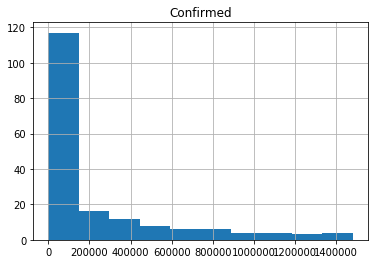

In [120]:
df.hist(column='Confirmed', bins=10)  #bin defines the shape of histogram.

In [121]:
df.columns

Index(['Date', 'Daily_Confirmed', 'Confirmed', 'Recovered', 'Recovered.1',
       'Deceased', 'Total_Deceased'],
      dtype='object')

In [122]:
df['Date'].replace(to_replace=df['Date'].unique(),value=list(range(0,len(df['Date'].unique()))),inplace=True)

In [123]:
df

,Date,Daily_Confirmed,Confirmed,Recovered,Recovered.1,Deceased,Total_Deceased
0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,0
2,2,0,1,0,0,0,0
3,3,1,2,0,0,0,0
4,4,1,3,0,0,0,0
...,...,...,...,...,...,...,...
175,175,48443,1288128,33326,817485,755,30657
176,176,48888,1337016,32514,849999,763,31420
177,177,50072,1387088,37125,887124,703,32123
178,178,48932,1436020,31512,918636,704,32827


In [124]:
X=df[['Date', 'Daily_Confirmed', 'Recovered', 'Recovered.1',
       'Deceased', 'Total_Deceased']]

In [125]:
Y=df[['Confirmed']].values
Y

array([[      1],
       [      1],
       [      1],
       [      2],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      3],
       [      5],
       [      6],
       [     28],
       [     30],
       [     31],
       [     34],
       [     39],
       [     48],
       [     63],
       [     71],
       [     81],
       [     91],
       [    102],
       [    112],
       [    126],
       [    146],
       [    171],
       [    198],
       [    256],
       [    334],
       [    403],
       [    497],
       [    571],
       [  

In [126]:
cdf=df[['Date', 'Confirmed','Recovered', 'Recovered.1','Deceased', 'Total_Deceased']]

In [148]:
train.shape

(143, 6)

In [149]:
test.shape

(36, 1)

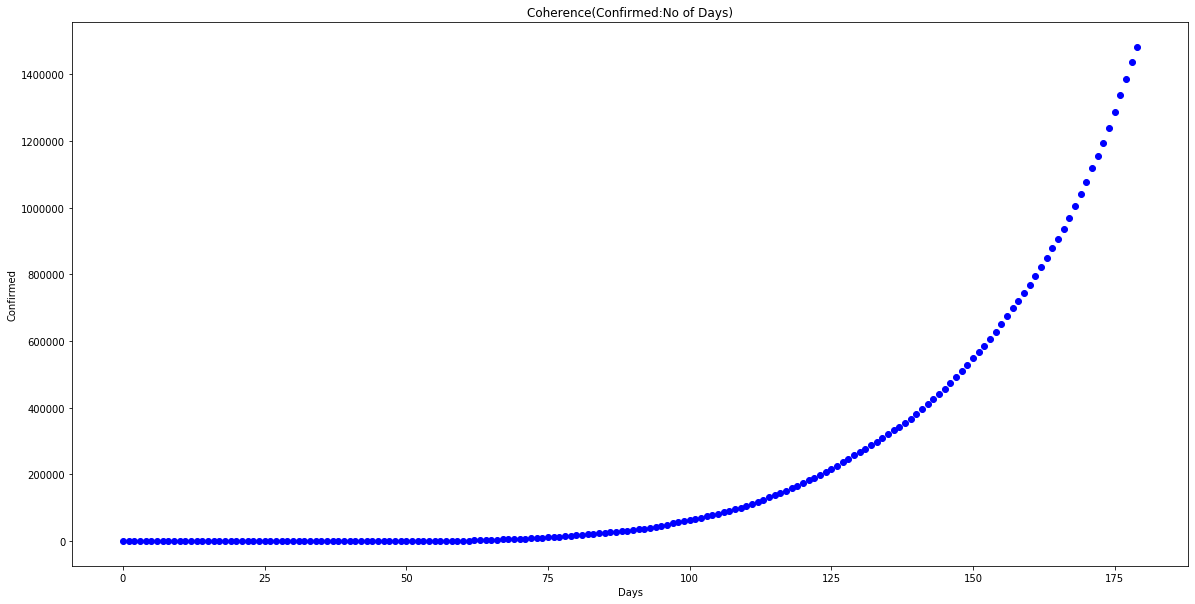

In [186]:
plt.figure(figsize=(20,10))
plt.scatter(df.Date,df.Confirmed,color='blue')
plt.xlabel("Days")
plt.ylabel("Confirmed")
plt.title("Coherence(Confirmed:No of Days)")
plt.show()

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print('whole set:',X.shape)

Train set: (144, 6) (144, 1)
Test set: (36, 6) (36, 1)
whole set: (180, 6)


In [152]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()  # variable and uses linear regression it has all math function
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
Y_pred = lin_reg.predict(np.array(X_test))

In [154]:
print(lin_reg.coef_)

[[210.93920036   4.50186538  -0.40673801   1.0621992    8.53207757
    6.22919251]]


In [155]:
print(lin_reg.intercept_)

[-7062.70913911]


In [156]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9996524401749494

In [169]:
pred=[]
for i in range(0,len(Y_pred)):
    dt=Y_pred[i][0]
    pred.append(dt)

actual=[]
test=np.asarray(Y_test)
for i in range(0,len(test)):
    dt=test[i][0]
    actual.append(dt)

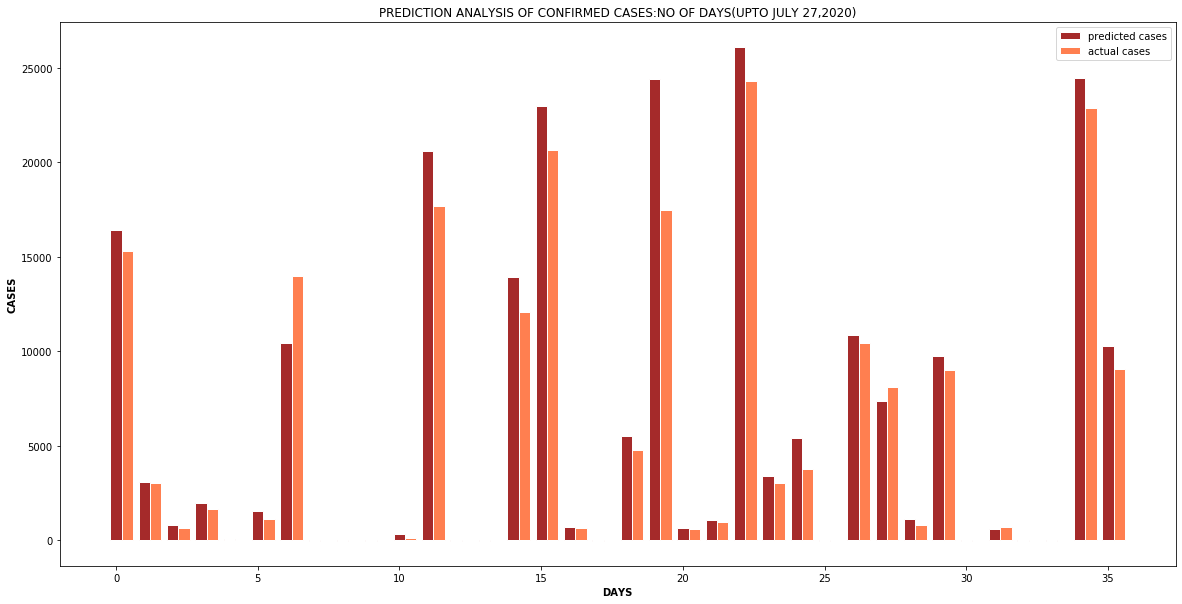

In [195]:
barWidth = 0.4

act1 =pred
pred1 =actual

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(20, 10))
plt.bar(r1, act1, color='brown', width=barWidth, edgecolor='white', label='predicted cases')
plt.bar(r2, pred1, color='coral', width=barWidth, edgecolor='white', label='actual cases')


plt.xlabel('DAYS', fontweight='bold')
plt.ylabel('CASES', fontweight='bold')

plt.title('PREDICTION ANALYSIS OF CONFIRMED CASES:NO OF DAYS(UPTO JULY 27,2020)')
ttl1.set_position([.5, 1.05]) 


plt.legend()
plt.show()

In [171]:
X1=df[['Date', 'Confirmed','Daily_Confirmed', 'Recovered.1',
       'Deceased', 'Total_Deceased']].values

In [161]:
Y1=df[['Recovered']].values

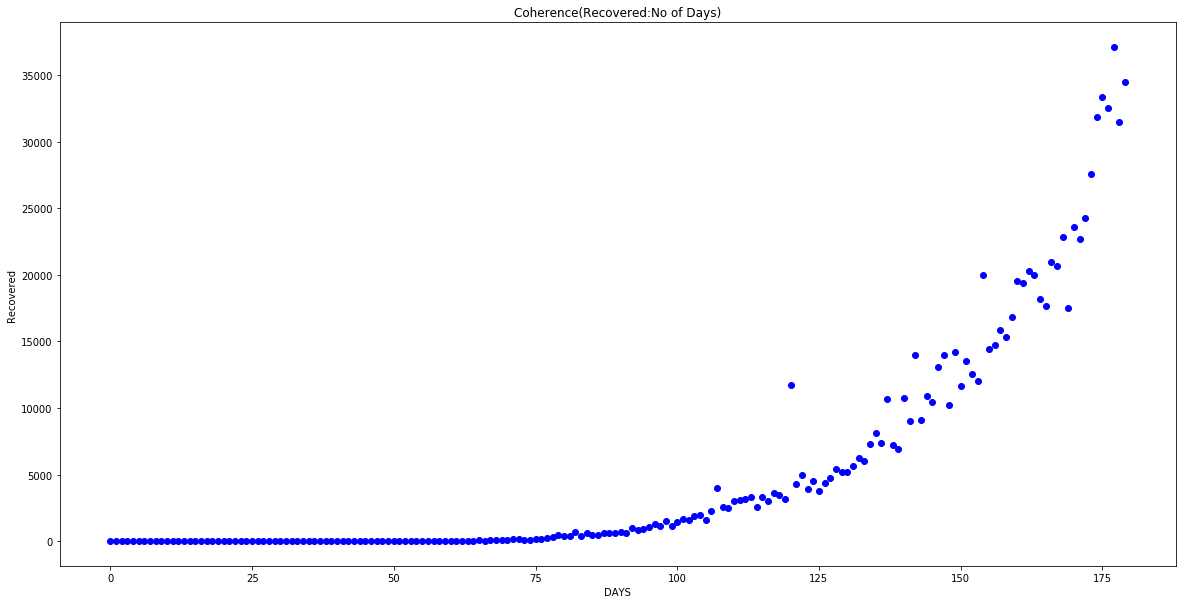

In [185]:
plt.figure(figsize=(20,10))
plt.scatter(df.Date,df.Recovered,color='blue')
plt.xlabel("DAYS")
plt.ylabel("Recovered")
plt.title("Coherence(Recovered:No of Days)")
plt.show()

In [164]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.20, random_state=4)
print ('Train set:', X1_train.shape,  Y1_train.shape)
print ('Test set:', X1_test.shape,  Y1_test.shape)
print('whole set:',X1.shape)

Train set: (144, 6) (144, 1)
Test set: (36, 6) (36, 1)
whole set: (180, 6)


In [165]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()  # variable and uses linear regression it has all math function
lin_reg1.fit(X1_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
Y1_pred = lin_reg1.predict(np.array(X1_test))

In [167]:
print(lin_reg1.coef_)

[[ 0.0597903  -0.00905967  0.39582743  0.02204482 -0.03003353  0.21578749]]


In [168]:
from sklearn.metrics import r2_score
r2_score(Y1_test,Y1_pred)

0.9540623553457362

In [177]:
pred=[]
for i in range(0,len(Y1_pred)):
    dt=Y1_pred[i][0]
    pred.append(dt)

actual=[]
test=np.asarray(Y1_test)
for i in range(0,len(test)):
    dt=test[i][0]
    actual.append(dt)

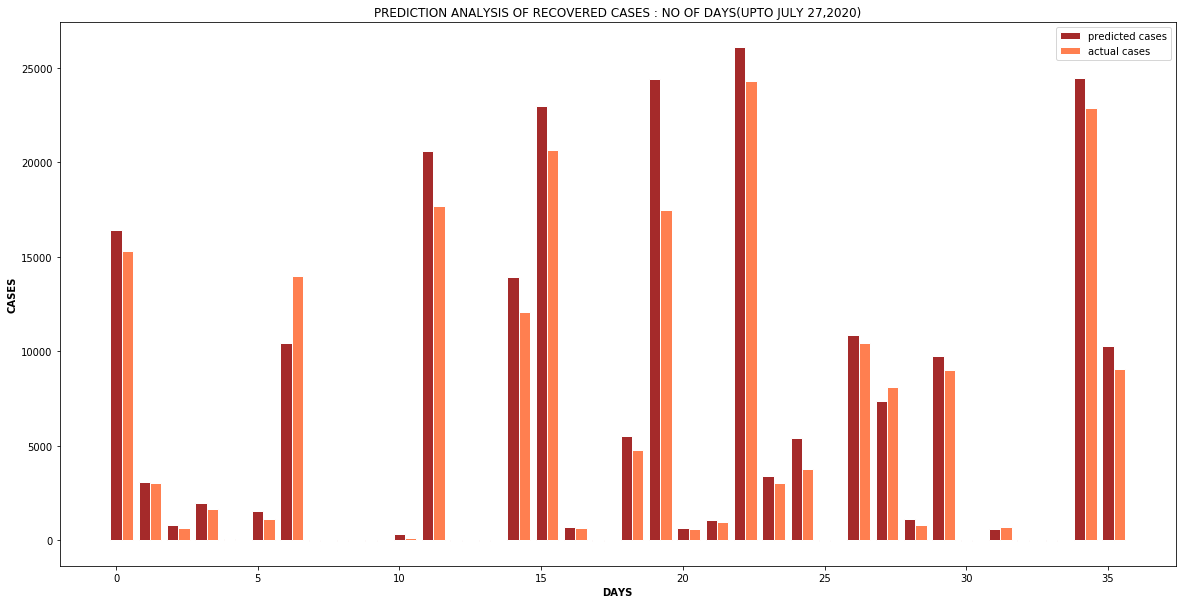

In [197]:
barWidth = 0.4

act2 =pred
pred2 =actual

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(20, 10))

plt.bar(r1, act2, color='brown', width=barWidth, edgecolor='white', label='predicted cases')
plt.bar(r2, pred2, color='coral', width=barWidth, edgecolor='white', label='actual cases')


plt.xlabel('DAYS', fontweight='bold')
plt.ylabel('CASES', fontweight='bold')

plt.title('PREDICTION ANALYSIS OF RECOVERED CASES : NO OF DAYS(UPTO JULY 27,2020)')
ttl1.set_position([.5, 1.05]) 


plt.legend()
plt.show()